# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel mini-projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to our Telegram community at https://bit.ly/UpLevelSG and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

1. Literature review and data collection (Part I)
2. Time-series modelling using ARIMA (Part II) 
3. Preparing the dataset according to literature (Part III) 
4. <font color = 'orange'>[Google Colab]</font> Train LSTM model to predict stock price (Part IV)

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You've been doing investing for a while now.</p>
<p>Coincidentally, in a bid to upskill yourself, you also learned machine learning and deep learning.</p> 
<p>Armed with these two skills, you're interested in combining the two, leveraging data techniques to predict stock prices.</p>    
<p>Googling around, you found a research paper that might be a good starting point. In this project, you will use the research study as a reference and use Long Short Term Memory and historical stock prices for stock market prediction.</p>
</div>

### Step 1: Read the research paper
Let's start with the research publication that we will be referring to in this project.

Head on <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227222">here</a> and spend around 30-60 mins to go through the paper. 

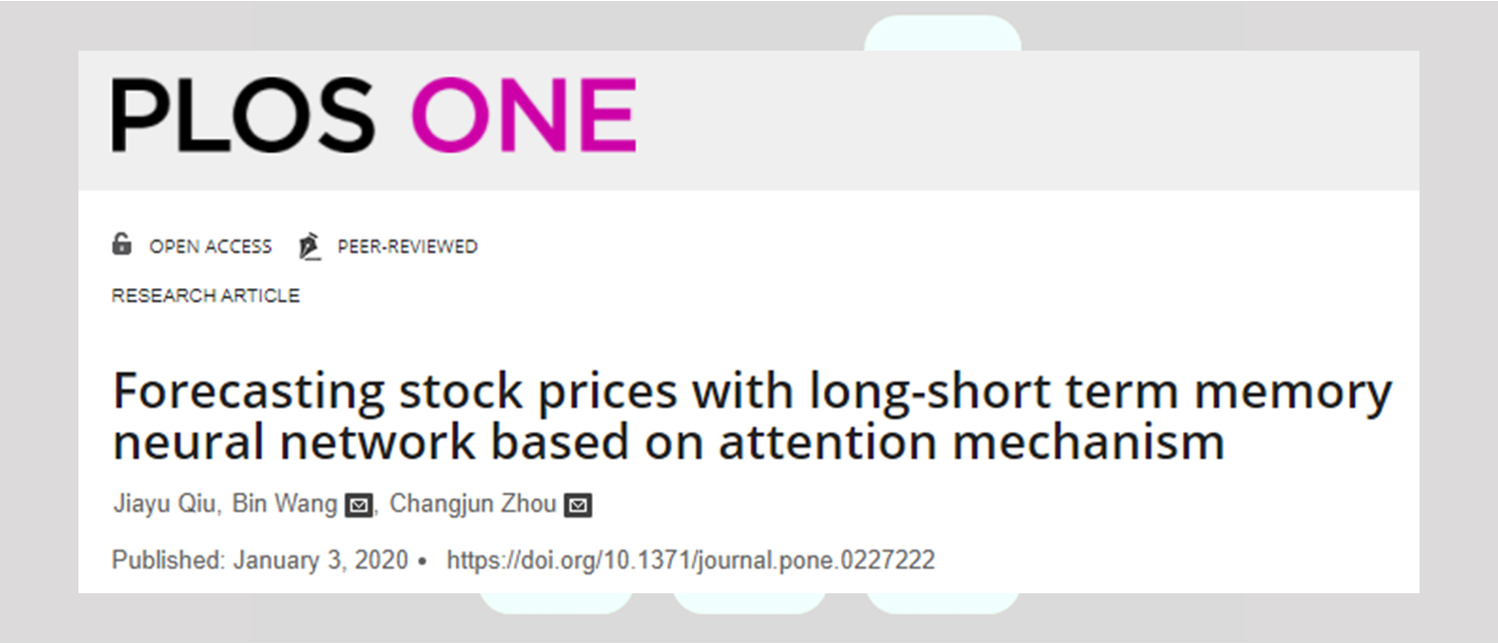

### Step 2: Import pandas
We <em>might</em> need to edit our data a bit after data retrieval, so let's import pandas first.

In [ ]:
# Step 2: Import pandas

In [1]:
import pandas as pd

### Step 3: Acquire S&P 500 data
In the paper, the authors used three sets of data:
- Standard & Poor's 500 Index (S&P 500)
- Hang Seng Index (HSI)
- Dow Jones Industrial Average (DJIA)

In this project, we will be working with <strong>only S&P 500 data</strong>. The other two datasets can be done at your own once you're familiar with one dataset.

Let's retrieve the S&P 500 data. 

We're all about the freedom of choice here in UpLevel. In fact, for our project, there are three possible ways to acquire the data you need:
1. Download the data used in the publication
2. Download the data directly from Yahoo Finance
3. Use yfinance library to download the data

They are all relatively straightforward ways to get your data, but Method 3 is definitely the most useful if you want to hone skills to acquire any stock data that you want/need.

You don't have to do all three, just one of the three will do. 

P.S. If you have done our previous finance-based projects, you might be wondering why AlphaVantage isn't part of the list. This is because AlphaVantage doesn't provide index data so we have to use other sources.

## [Option 1] Download the data used in the research publication
At the publication page, scroll down and download the zip file containing the three CSV files.

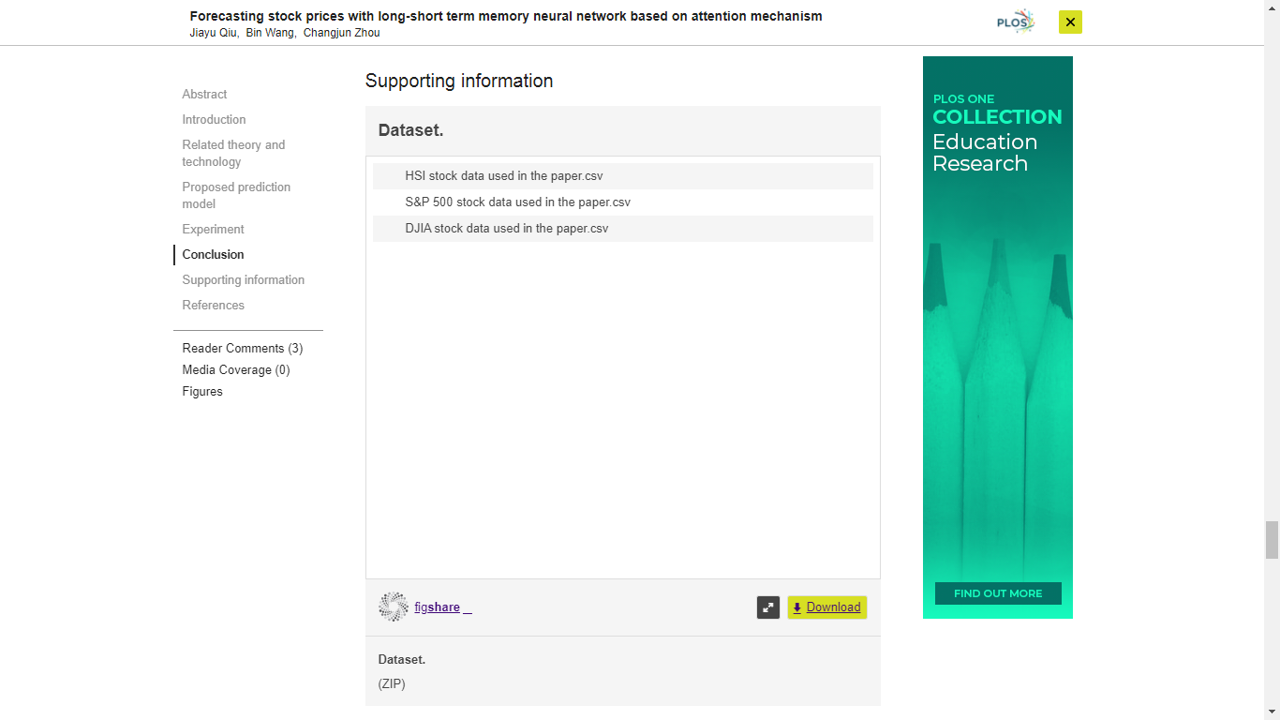

Ta-da you're all set.

## [Option 2] Download the data directly from Yahoo Finance
If you'd like to download data beyond what you have from the publication, you can obtain data directly by yourself. 

Head on <a href = "https://finance.yahoo.com/quote/%5EGSPC/history/">here</a> to go to Yahoo Finance's page for S&P 500 historical prices. 

At the page, this is most likely what you'll see:

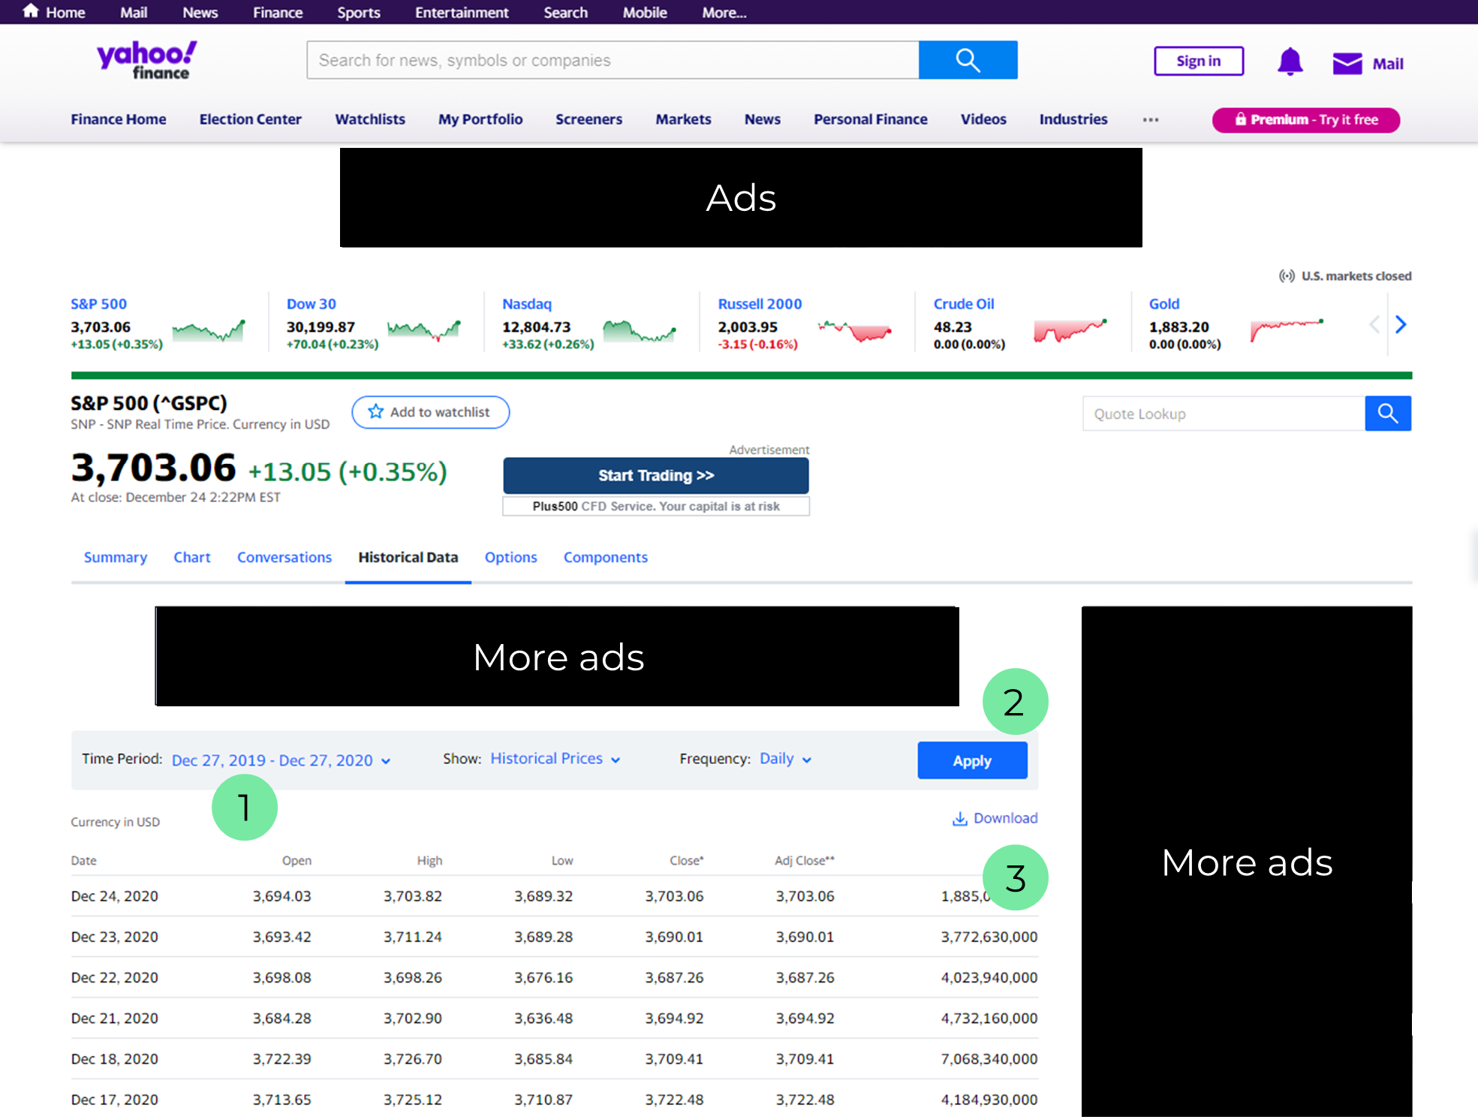

There are three components in the page that you should keep an eye out for:
1. Time period
2. Apply changes
3. Download button

You can go with "Max" when setting time period - we can filter it ourselves in the subsequent steps. 

Alternatively, just go with the time between 2000-01-03 and 2019-07-01 (inclusive) and you're all set for S&P 500.

Double check your CSV after you download it!
### Read the downloaded CSV as a DataFrame
After you download the CSV, read it as a DataFrame. Make sure the date is your column so you can see something like this:

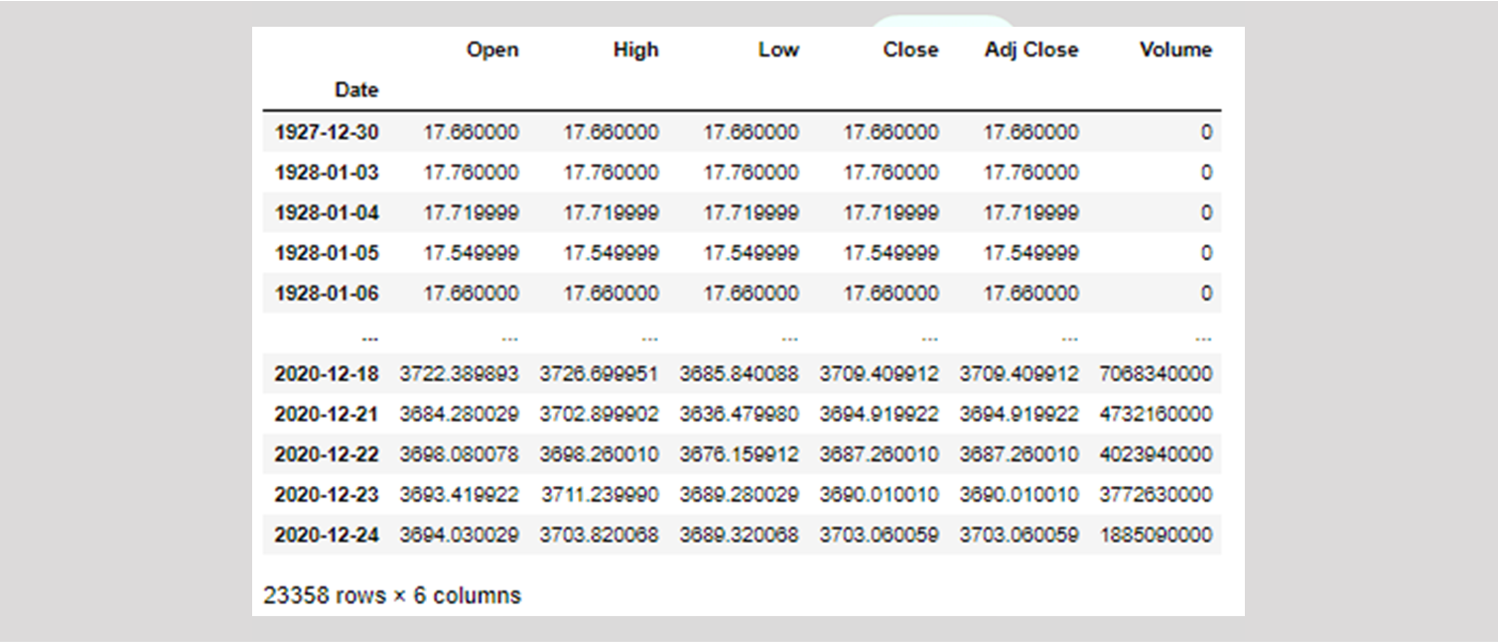

It won't be exactly the same DataFrame you'll see, but it'll be similar, i.e. the date starts on 1927-12-30 and ends on the day you download the CSV.

In [ ]:
# Read the downloaded S&P 500 CSV as a DataFrame

In [8]:
df_sp500=pd.read_csv("S&P500.csv")

In [9]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000/1/3,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000/1/4,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000/1/5,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000/1/6,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000/1/7,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


### Convert the Index into DateTimeIndex
The index is still an Index object, which means you'll need to convert it to a DateTimeIndex object.

This is so that we can slice the DataFrame into the same timeframe used by the authors.

<details>
    <summary><font color = 'green'>Click once for hint</font></summary>
    <div>
        <strong>Google "convert index to datetimeindex pandas"</strong>
    </div>
</details>

In [ ]:
# Convert Index to DateTimeIndex

In [10]:
df_sp500.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df_sp500.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
df_sp500['Date']= pd.to_datetime(df_sp500['Date'])

In [14]:
df_sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [15]:
df_sp500 = df_sp500.set_index('Date')

In [16]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


### Slice the DataFrame between 2000-01-03 and 2019-07-01 (inclusive)
Now that you're done with index conversion, we can slice the DataFrame to be between 2000-01-03 and 2019-07-01 (inclusive).

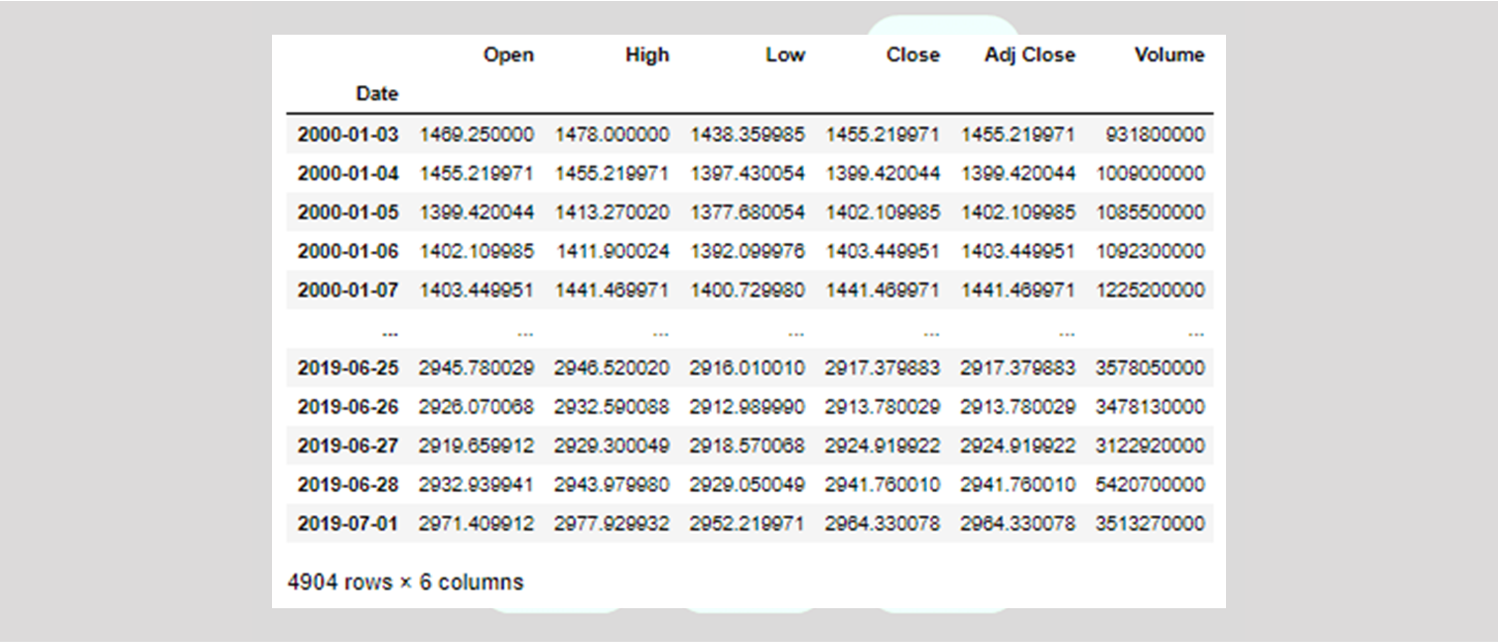

<details>
    <summary><font color = 'green'>Click once for hint</font></summary>
    <div>
        <strong>Google "pandas slice between dates"</strong>
    </div>
</details>

In [ ]:
# Slice the DataFrame

In [17]:
df_sp500_sliced=df_sp500['2000-01-03' :'2019-07-01']

### Export sliced S&P DataFrame to CSV
Now that you're done with slicing, let's export the DataFrame to a CSV.

In [ ]:
# Export S&P 500 DataFrame to CSV

In [18]:
df_sp500_sliced.to_csv(r'sp500_final.csv')

## [Option 3] Use yfinance library to download the data
yfinance is a library that works with Yahoo Finance. 

It's one of the several libraries available that works with Yahoo Finance, but we thought this library was easy to use and relatively straightforward. 

Plus, the data is returned in a pandas DataFrame.

Go ahead and pip install yfinance if you're interested in Option 3.

### Check out the documentation
Head on to yfinance's documentation at https://pypi.org/project/yfinance/

It's a short read, and contains all the instructions you need for the subsequent steps.

### Retrieve S&P 500 using yfinance
The ticker for S&P 500 is "^GSPC". 

You'll need to retrieve it from the <strong>start</strong> at 2000-01-03 and the <strong>end</strong> at 2019-07-01. 

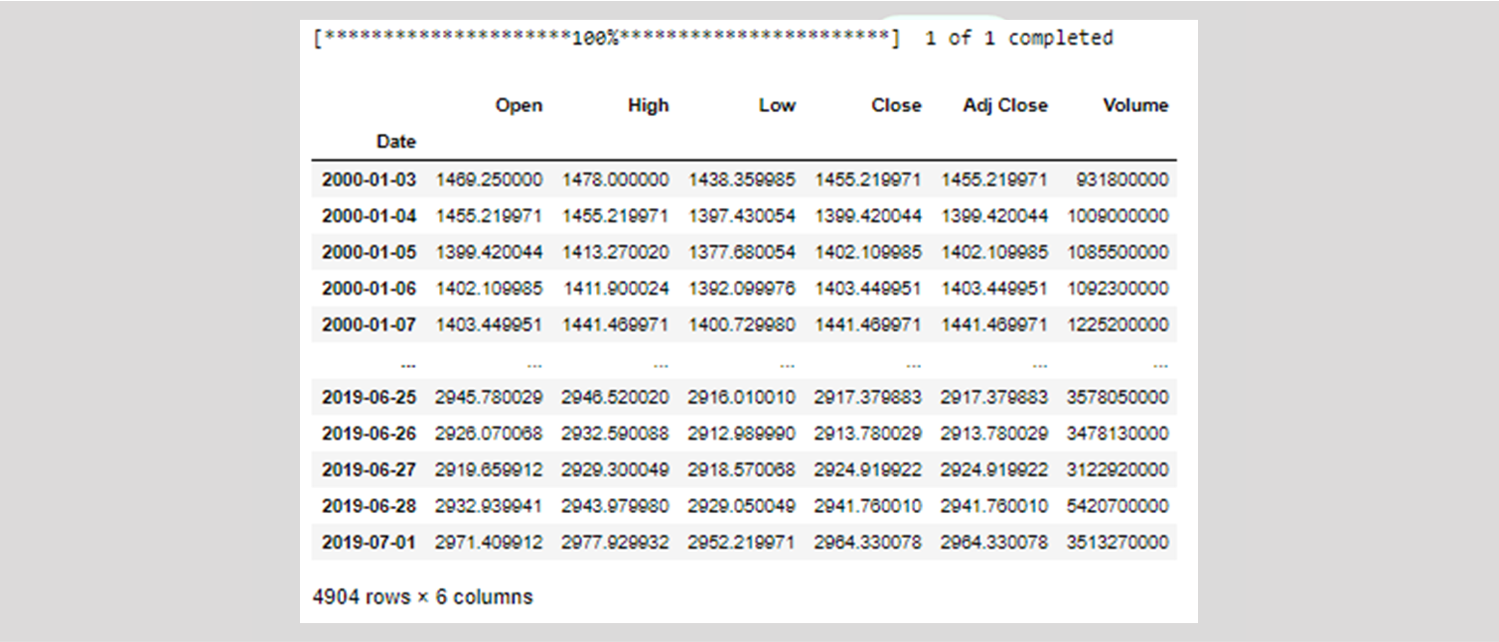

Things to take note of:
1. Don't use the Ticker object
2. Use the <strong>download</strong> method
3. You might be missing 2019-07-01 if you defined your end wrongly

In [ ]:
# Retrieve the S&P 500 data using yfinance library

### Export the yfinance DataFrame to CSV
Now that you've retrieved the data (easy wasn't it?), you can now export the DataFrame into a CSV.

In [ ]:
# Export the yfinance DataFrame to a CSV

### End of Part I
All right! You've retrieved the data. There are just so many ways of doing the same thing, but if you followed the instructions well, the three different ways would have led to the same outome.

The research paper is lengthy and we can't cover everything, so we will try to do mainly answer two things:
1. Can LSTM help with stock predictions?
2. Can using signal processing technique help with improving stock predictions?

In Part II, we'll work with the data and build a time-series ARIMA model.